本文中，我们将使用*Python*模块[gensim](http://radimrehurek.com/gensim/models/word2vec.html#id6)对文本训练，生成词向量（即将每个词用向量表示）。使用的数据集为Mikolov所使用的[text8](http://mattmahoney.net/dc/text8.zip)，训练模型为*skip-gram*, *CBOW*。如果你对词向量的概念不甚熟悉，可以拜读下皮果提的[CSDN博客](http://blog.csdn.net/itplus/article/details/37969519)，他深入浅出的介绍了一些列的背景知识、相关概念以及理论推导。

In [1]:
from collections import Counter
from gensim.models import word2vec 
from glove import Glove 
from glove import Corpus 
import argparse
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda2\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Program Files\Anaconda2\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


首先，我们读取本地的*text8*数据，关于*gensim*里面的词向量建模工具*word2vec*，可以参看官方文档。

In [50]:
sentences = word2vec.Text8Corpus('text8')
words = open('text8').read().split()

In [51]:
help(word2vec.Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Class for training, using and evaluating neural networks described in https://code.google.com/p/word2vec/
 |  
 |  The model can be stored/loaded via its `save()` and `load()` methods, or stored/loaded in a format
 |  compatible with the original word2vec implementation via `save_word2vec_format()` and `load_word2vec_format()`.
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, word)
 |  
 |  __getitem__(self, words)
 |      Accept a single word or a list of words as input.
 |      
 |      If a single word: returns the word's representations in vector space, as
 |      a 1D numpy array.
 |      
 |      Multiple words: return the words' representations in vector space, as a
 |      2d numpy array: #words x #vector_size. Matrix rows are in the same order
 |      as in input

## CBOW模型

CBOW模型主要思想是给定中心词的上下文环境来推测该中心词，按照官方文档要求，如果我们将*word2vec*函数里面的*sg*参数设置为0，则模型就是*CBOW*（Continuous Bag-Of-Words Model)。这里，我们词向量的长度设置为80，窗户宽度为5，最小频数为3（低于此的词都会被过滤），采用的是*Negative Resampling*方法。

In [52]:
model = word2vec.Word2Vec(sentences, size=80, sg=0, window=5, min_count=3, workers=4)

我们可以查看下词向量，比如"computer"。

In [53]:
model['computer']

array([-0.7889151 ,  2.57638907,  0.71387476,  3.5468154 ,  0.41858387,
        1.25195789,  0.02774129,  0.80198348,  0.51213712, -1.47162735,
        0.84308237, -0.54545844,  1.27416217, -3.77488232,  1.08659899,
        0.26655549,  1.32632828,  0.61672175, -2.0221889 ,  0.87499785,
        2.0791204 , -1.69669724,  0.20846505, -1.97534192,  0.90497196,
       -1.15085852,  0.06075237, -0.65608424, -2.17340827,  0.74473721,
       -1.9040302 , -2.88258481,  2.0680604 ,  1.01197982,  1.9759059 ,
       -1.56125462,  5.65145969, -1.03037155, -0.74494332, -1.97905123,
       -1.45483541,  0.95635515, -3.12459373, -1.24674857,  2.92067599,
        0.23950374,  2.1025219 , -0.15634575,  0.93036842, -0.04727279,
       -1.72456384, -0.31952208, -3.00255752,  0.6741842 , -2.16323972,
       -0.48680282,  0.90198326, -2.22333264,  4.4875164 , -2.34618831,
       -1.89073229, -0.12513414, -1.94989014,  1.94264817, -2.14380693,
        1.03951406,  1.21858323, -1.32922482,  0.8186475 ,  1.03

我们可以对这些词向量进行可视化，利用PCA降维。为方便起见，我们取词频靠前的500个单词及其词向量，然后用散点图显示。

In [54]:
word_freq = Counter(words)
stopwords = ['the', 'of', 'and', 'a', 'to', 's']

In [55]:
freq_words = word_freq.most_common(500)
freq_words = [k for k,v in freq_words if k not in stopwords]

In [56]:
freq_words_vec = [model[word] for word in freq_words]

In [57]:
freq_words_vec = np.array(freq_words_vec)

In [58]:
#将词向量降维为2维向量
model_TSNE = TSNE(n_components=2, random_state=0)
freq_words_vec_2D = model_TSNE.fit_transform(freq_words_vec)

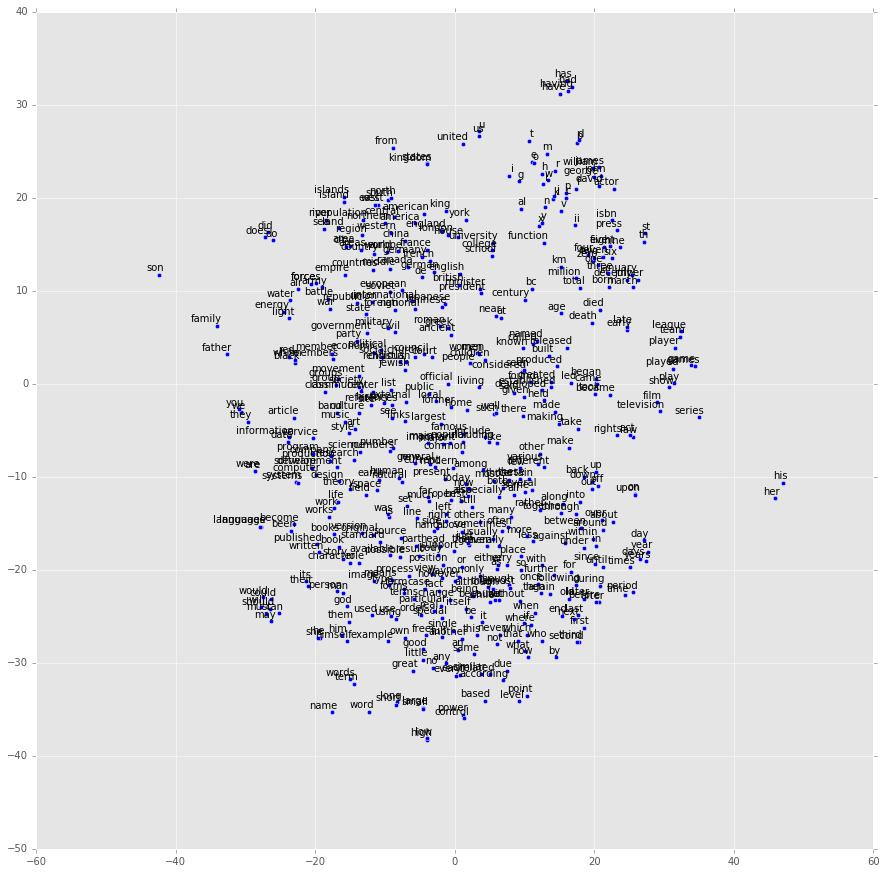

In [59]:
plt.style.use('ggplot')#设置ggplot风格的背景
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    #显示散点图并进行标注
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  plt.show()
plot(freq_words_vec_2D, freq_words)

从词向量散点图可以看出类似词语之间的聚类性，比如"school"、"university"、"college"三个单词距离很近。26个字母也分布在紧邻区域。

下面，我们可以利用*gensim*自带的函数之间查看下不同单词之间的相似度。

In [60]:
model.similarity('boy', 'girl')

0.78125115874045381

In [61]:
y1 = model.similarity("woman", "man")
print u"woman和man的相似度为：", y1
print "--------\n"

woman和man的相似度为： 0.782769674876
--------



In [62]:
# 计算某个词的相关词列表
y2 = model.most_similar("nice", topn=20)  # 20个最相关的
print u"和nice最相关的词有：\n"
for item in y2:
    print item[0], item[1]
print "--------\n"

和nice最相关的词有：

bum 0.657670259476
goodbye 0.642052769661
fun 0.639811813831
funny 0.637775599957
ghi 0.633398652077
shit 0.632712602615
stuff 0.624810814857
candy 0.621814608574
doo 0.616513252258
yeah 0.614931583405
sorry 0.610681414604
bye 0.605617046356
nigga 0.605025351048
dirty 0.59898942709
pleasant 0.598796844482
hey 0.59812015295
cute 0.59547495842
dear 0.591798603535
praline 0.590020179749
loaf 0.588990747929
--------



In [63]:
# 寻找对应关系
print ' "man" is to "father" as "woman" is to ...? \n'
y3 = model.most_similar(['woman', 'father'], ['man'], topn=3)
for item in y3:
    print item[0], item[1]
print "--------\n"

 "man" is to "father" as "woman" is to ...? 

mother 0.87699341774
wife 0.840066730976
daughter 0.814409077168
--------



In [64]:
more_examples = ["he his she", "big bigger bad", "going went being"]
for example in more_examples:
    a, b, x = example.split()
    predicted = model.most_similar([x, b], [a])[0][0]
    print "'%s' is to '%s' as '%s' is to '%s'" % (a, b, x, predicted)
print "--------\n"

'he' is to 'his' as 'she' is to 'her'
'big' is to 'bigger' as 'bad' is to 'worse'
'going' is to 'went' as 'being' is to 'was'
--------



In [65]:
# 寻找不合群的词
y4 = model.doesnt_match("breakfast cereal dinner lunch".split())
print u"不合群的词：", y4
print "--------\n"


不合群的词： cereal
--------



In [66]:
# 保存模型，以便重用
model.save("text8.model")
# 对应的加载方式
# model_2 = word2vec.Word2Vec.load("text8.model")

## Skip-gram模型

Skip-gram实际上与CBOW模型很类似，只不过这里是给定中心词来推断上下文环境。在*gensim*里面只需修改参数便可以实现训练过程的变换。

In [67]:
model = word2vec.Word2Vec(sentences, size=80, sg=1, window=5, min_count=3, workers=4)

同样抽取前500个单词及其向量进行可视化显示。

In [68]:
freq_words_vec = [model[word] for word in freq_words]
freq_words_vec = np.array(freq_words_vec)
#将词向量降维为2维向量
model_TSNE = TSNE(n_components=2, random_state=0)
freq_words_vec_2D = model_TSNE.fit_transform(freq_words_vec)

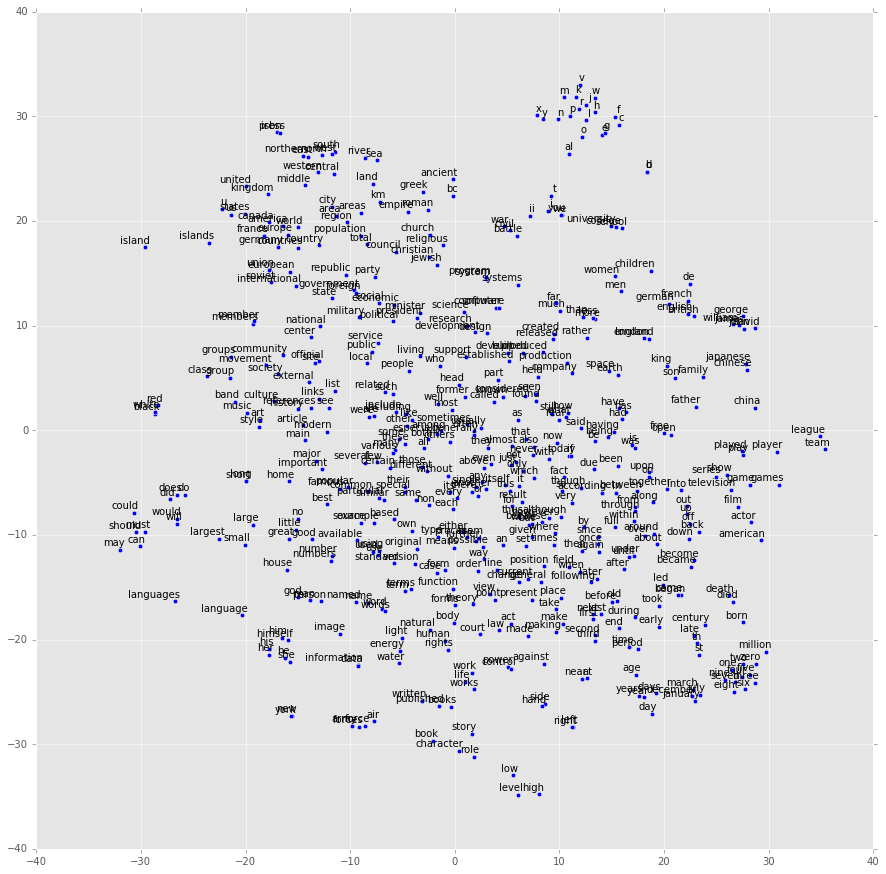

In [69]:
plot(freq_words_vec_2D, freq_words)

与CBOW模型生成的图示有所差别，但是类似的词语距离也比较近。

In [70]:
model.similarity('boy', 'girl')

0.63827266644132097

## Global Vector Model

下面，我们使用另外一种词向量模型GLOVE，由斯坦福大学的Jeffrey Pennington, Richard Socher等人提出。前面的CBOW以及skip-gram模型考虑的是从给定窗口语言环境里面对词进行预测，而Glove模型则还考虑了全局的词频。具体可以参考[官方网站](http://www-nlp.stanford.edu/projects/glove/)。

In [3]:
def read_corpus(filename): 
    delchars = [chr(c) for c in range(256)] 
    delchars = [x for x in delchars if not x.isalnum()] 
    delchars.remove(' ') 
    delchars = ''.join(delchars) 
    with open(filename, 'r') as datafile: 
        for line in datafile: 
            yield line.lower().translate(None, delchars).split(' ') 

这里，我们还是使用*text8*数据进行训练。

In [4]:
sentences = read_corpus('text8')

In [5]:
corpus_model = Corpus()

In [6]:
#Co-occurence矩阵窗口设置为5
corpus_model.fit(sentences, window=5)

In [7]:
corpus_model.save('corpus.model')

利用glove模型进行训练。

In [8]:
glove = Glove(no_components=100, learning_rate=0.05)

In [9]:
glove.fit(corpus_model.matrix, epochs=10, 
                  no_threads=2, verbose=True) 
glove.add_dictionary(corpus_model.dictionary)

Performing 10 training epochs with 2 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


查看次的相似度。

In [73]:
glove.most_similar('man')

[('woman', 0.89370058332838531),
 ('young', 0.87227275532070192),
 ('girl', 0.85904214633245313),
 ('child', 0.85130519182657105)]

In [74]:
dir(glove)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_similarity_query',
 'add_dictionary',
 'alpha',
 'biases_sum_gradients',
 'dictionary',
 'fit',
 'inverse_dictionary',
 'learning_rate',
 'load',
 'load_stanford',
 'max_count',
 'max_loss',
 'most_similar',
 'most_similar_paragraph',
 'no_components',
 'random_state',
 'save',
 'transform_paragraph',
 'vectors_sum_gradients',
 'word_biases',
 'word_vectors']

注意glove.dictionary里面存储的是每个单词在glove.word_vectors里面对应的坐标。

In [79]:
indice = [glove.dictionary[word] for word in freq_words]
freq_words_vec = glove.word_vectors[indice, :]
#将词向量降维为2维向量
model_TSNE = TSNE(n_components=2, random_state=0)
freq_words_vec_2D = model_TSNE.fit_transform(freq_words_vec)

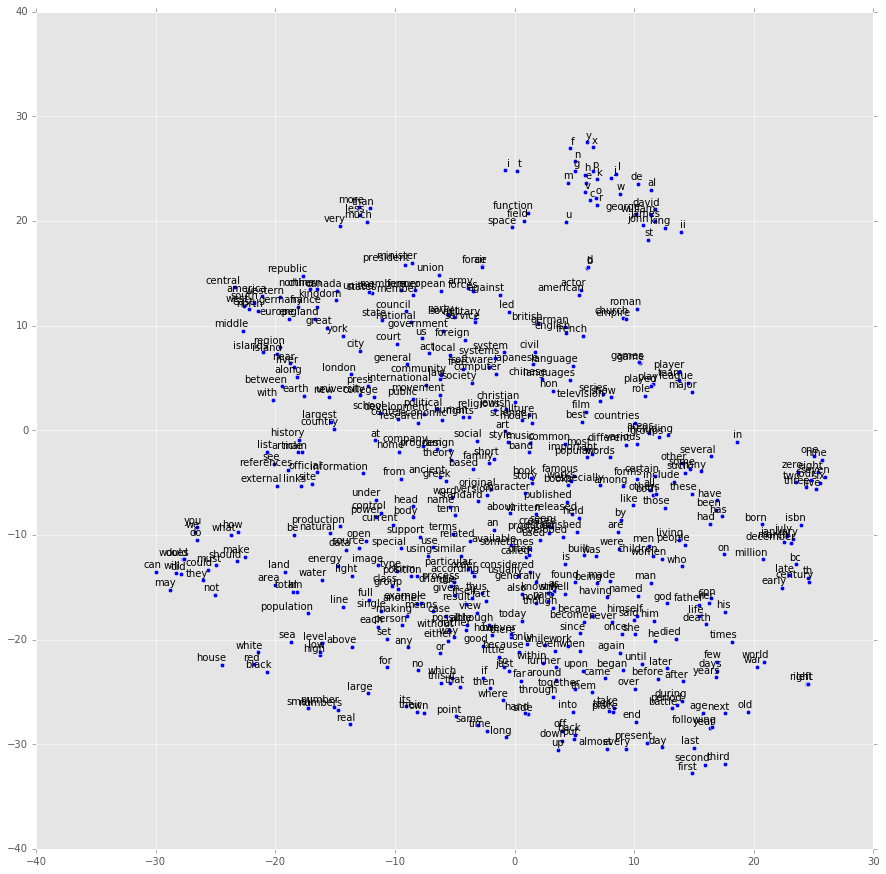

In [80]:
plot(freq_words_vec_2D, freq_words)

可以看到类似单词词向量距离比较近。